In [2]:
library(nycflights13)
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Brainstorm at least 5 different ways to assess the typical delay characteristics of a group of flights. Consider the following scenarios:

* A flight is 15 minutes early 50% of the time, and 15 minutes late 50% of the time.
* A flight is always 10 minutes late.
* A flight is 30 minutes early 50% of the time, and 30 minutes late 50% of the time.
* 99% of the time a flight is on time. 1% of the time it’s 2 hours late.

A flight is 15 minutes early 50% of the time, and 15 minutes late 50% of the time

In [3]:
flights %>%
  group_by(flight) %>%
  summarize(ealy15_min = mean(arr_delay <= -15, na.rm = TRUE),
            late15_min = mean(arr_delay >= 15, na.rm = TRUE)) %>%
  filter(ealy15_min == 0.5,
         late15_min == 0.5)

flight,ealy15_min,late15_min
<int>,<dbl>,<dbl>
107,0.5,0.5
2072,0.5,0.5
2366,0.5,0.5
2500,0.5,0.5
2552,0.5,0.5
3495,0.5,0.5
3505,0.5,0.5
3518,0.5,0.5
3544,0.5,0.5


A flight is always 10 minutes late.

In [4]:
flights %>% 
  group_by(flight) %>% 
  summarise(prop.same.late = n_distinct(arr_delay, na.rm = TRUE) / n(), 
            mean.arr.delay = mean(arr_delay, na.rm = TRUE),
            n = n()) %>%
  filter(prop.same.late == 1 & mean.arr.delay == 10)

flight,prop.same.late,mean.arr.delay,n
<int>,<dbl>,<dbl>,<int>
2254,1,10,1
3656,1,10,1
3880,1,10,1
5854,1,10,1


A flight is 30 minutes early 50% of the time, and 30 minutes late 50% of the time.

In [5]:
flights %>% 
  group_by(flight) %>% 
  summarise(early30_min = sum(arr_delay <= -30, na.rm = TRUE) / n(),
            late30_min = sum(arr_delay >= 30, na.rm = TRUE) / n(),
            n = n()) %>% 
  filter(early30_min == 0.5 & late30_min == 0.5)

flight,early30_min,late30_min,n
<int>,<dbl>,<dbl>,<int>
3651,0.5,0.5,2
3916,0.5,0.5,2
3951,0.5,0.5,2


99% of the time a flight is on time. 1% of the time it’s 2 hours late.

In [6]:
flights %>% 
  group_by(flight) %>% 
  summarise(earlyflight = sum(arr_delay <= 0, na.rm = TRUE) / n(),
            lateflight = sum(arr_delay >= 120, na.rm = TRUE) / n(),
            n = n()) %>% 
  filter(earlyflight == .99 & lateflight == .01 )

flight,earlyflight,lateflight,n
<int>,<dbl>,<dbl>,<int>


Which is more important: arrival delay or departure delay?  
 Arrival delay is more important since it affects making connections and schedules.  
 Departure delay will affect wait time in the ariport


Come up with another approach that will give you the same output as not_cancelled %>% count(dest) and not_cancelled %>% count(tailnum, wt = distance) (without using count()).

In [13]:
not_cancelled %>%
group_by(dest) %>% 
summarise(n = n())


dest,n
<chr>,<int>
ABQ,254
ACK,265
ALB,419
ANC,8
ATL,16898
AUS,2418
AVL,263
BDL,412
BGR,360


In [14]:
not_cancelled %>% 
group_by(tailnum) %>% 
summarise(n = sum(distance))

tailnum,n
<chr>,<dbl>
D942DN,3418
N0EGMQ,240626
N10156,110389
N102UW,25722
N103US,24619
N104UW,25157
N10575,141475
N105UW,23618
N107US,21677


Our definition of cancelled flights (is.na(dep_delay) | is.na(arr_delay) ) is slightly suboptimal.  
Why? If a flight never departs, then it won’t arrive. A flight could also depart and not arrive if it crashes, or if it is redirected and lands in an airport other than its intended destination.  
The more important column is arr_delay , which indicates the amount of delay in arrivals

In [20]:
flights %>% 
  filter(is.na(arr_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,1525,1530,-5,1934,1805,NA,MQ,4525,N719MQ,LGA,XNA,NA,1147,15,30,2013-01-01 15:00:00
2013,1,1,1528,1459,29,2002,1647,NA,EV,3806,N17108,EWR,STL,NA,872,14,59,2013-01-01 14:00:00
2013,1,1,1740,1745,-5,2158,2020,NA,MQ,4413,N739MQ,LGA,XNA,NA,1147,17,45,2013-01-01 17:00:00
2013,1,1,1807,1738,29,2251,2103,NA,UA,1228,N31412,EWR,SAN,NA,2425,17,38,2013-01-01 17:00:00
2013,1,1,1939,1840,59,29,2151,NA,9E,3325,N905XJ,JFK,DFW,NA,1391,18,40,2013-01-01 18:00:00
2013,1,1,1952,1930,22,2358,2207,NA,EV,4333,N11194,EWR,TUL,NA,1215,19,30,2013-01-01 19:00:00
2013,1,1,2016,1930,46,NA,2220,NA,EV,4204,N14168,EWR,OKC,NA,1325,19,30,2013-01-01 19:00:00
2013,1,1,NA,1630,NA,NA,1815,NA,EV,4308,N18120,EWR,RDU,NA,416,16,30,2013-01-01 16:00:00
2013,1,1,NA,1935,NA,NA,2240,NA,AA,791,N3EHAA,LGA,DFW,NA,1389,19,35,2013-01-01 19:00:00


Look at the number of cancelled flights per day. Is there a pattern? Is the proportion of cancelled flights related to the average delay?

In [27]:
cancelled_flights <- flights %>% group_by(year, month, day) %>% 
  summarise(n = n(),
            flight_n_cancelled = sum(is.na(air_time)),
            flight_not_cancelled = n - flight_n_cancelled,
            flight_prop_cancelled = flight_n_cancelled / n,
            delay = mean(arr_delay, na.rm = TRUE)
            )

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


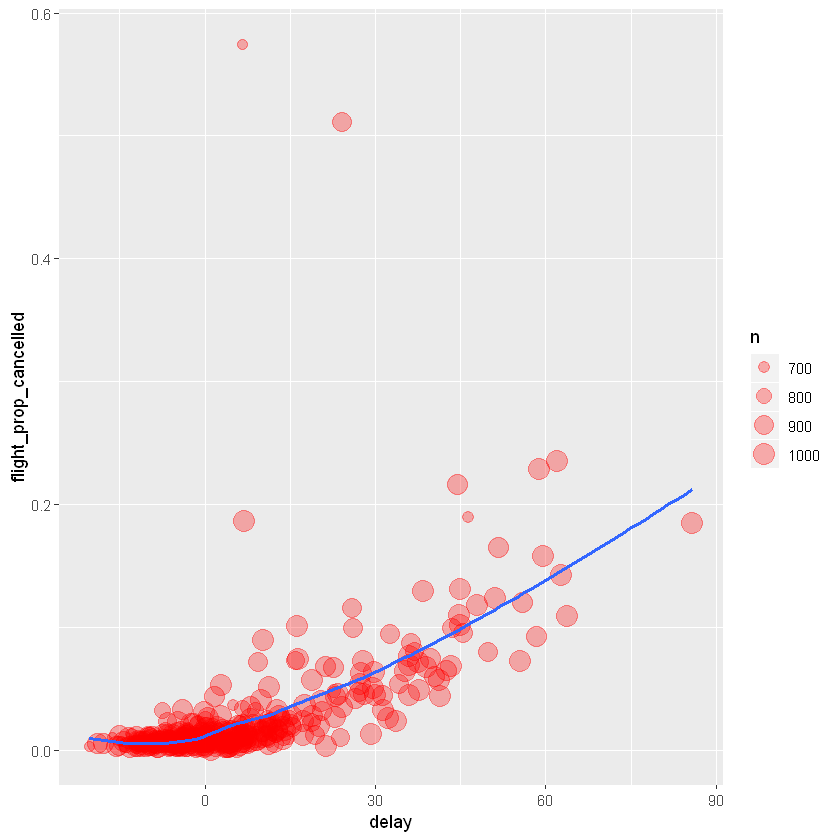

In [36]:
cancelled_flights %>%
  ggplot(aes(delay, flight_prop_cancelled)) +
  geom_point(aes(size = n), alpha = 0.3 ,color="red") +
  geom_smooth(se = FALSE)

In [38]:
cancelled_flights %>% arrange(desc(flight_prop_cancelled)) %>% head(2)

year,month,day,n,flight_n_cancelled,flight_not_cancelled,flight_prop_cancelled,delay
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
2013,2,9,684,393,291,0.5745614,6.639175
2013,2,8,930,475,455,0.5107527,24.228571


Which carrier has the worst delays? Challenge: can you disentangle the effects of bad airports vs. bad carriers? Why/why not? (Hint: think about flights %>% group_by(carrier, dest) %>% summarise(n()))

In [39]:
flights %>% 
  group_by(carrier) %>% 
  summarise(avg.delay = mean(arr_delay, na.rm = TRUE)) %>% 
  arrange(desc(avg.delay))

carrier,avg.delay
<chr>,<dbl>
F9,21.9207048
FL,20.1159055
EV,15.7964311
YV,15.5569853
OO,11.9310345
MQ,10.7747334
WN,9.6491199
B6,9.4579733
9E,7.3796692


In [40]:
flights %>% 
  group_by(dest) %>% 
  summarise(avg.delay = mean(arr_delay, na.rm = TRUE),
            n = n()) %>% 
  arrange(desc(avg.delay))

dest,avg.delay,n
<chr>,<dbl>,<int>
CAE,41.76415,116
TUL,33.65986,315
OKC,30.61905,346
JAC,28.09524,25
TYS,24.06920,631
MSN,20.19604,572
RIC,20.11125,2454
CAK,19.69834,864
DSM,19.00574,569


What does the sort argument to count() do. The results are automatically sorted into descending order  
When might you use it? When you want to view the data in descending order

In [41]:
flights %>% 
        count(dest, sort = TRUE)

dest,n
<chr>,<int>
ORD,17283
ATL,17215
LAX,16174
BOS,15508
MCO,14082
CLT,14064
SFO,13331
FLL,12055
MIA,11728


Exercise 5.7.1

Which plane (tailnum) has the worst on-time record?

In [42]:
flights %>% 
        group_by(tailnum) %>% 
        summarise(avg.delay = mean(arr_delay, na.rm = TRUE), n = n()) %>% 
        arrange(desc(avg.delay))

tailnum,avg.delay,n
<chr>,<dbl>,<int>
N844MH,320.00000,1
N911DA,294.00000,1
N922EV,276.00000,1
N587NW,264.00000,1
N851NW,219.00000,1
N928DN,201.00000,1
N7715E,188.00000,1
N654UA,185.00000,1
N665MQ,174.66667,6


What time of day should you fly if you want to avoid delays as much as possible?

In [44]:
flights%>% 
        group_by(hour) %>% 
        summarise(avg.delay = mean(arr_delay, na.rm = TRUE)) %>% 
        arrange(avg.delay)

hour,avg.delay
<dbl>,<dbl>
7,-5.3044716
5,-4.7969072
6,-3.3844854
9,-1.4514074
8,-1.1132266
10,0.9539401
11,1.4819300
12,3.4890104
13,6.5447397


For each destination, compute the total minutes of delay. For each, flight, compute the proportion of the total delay for its destination.

In [46]:
flights %>% 
        group_by(dest) %>% 
        filter(arr_delay > 0) %>% 
        mutate(tot.delay = sum(arr_delay),
               prop.delay = arr_delay / tot.delay) %>% 
        select(year:day, dest, arr_delay, tot.delay, prop.delay)

year,month,day,dest,arr_delay,tot.delay,prop.delay
<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
2013,1,1,IAH,11,99391,1.106740e-04
2013,1,1,IAH,20,99391,2.012255e-04
2013,1,1,MIA,33,140424,2.350026e-04
2013,1,1,ORD,12,283046,4.239594e-05
2013,1,1,FLL,19,202605,9.377853e-05
2013,1,1,ORD,8,283046,2.826396e-05
2013,1,1,LAX,7,203226,3.444441e-05
2013,1,1,DFW,31,110009,2.817951e-04
2013,1,1,ATL,12,300299,3.996017e-05


Delays are typically temporally correlated: even once the problem that caused the initial delay has been resolved, later flights are delayed to allow earlier flights to leave. Using lag() explore how the delay of a flight is related to the delay of the immediately preceding flight.

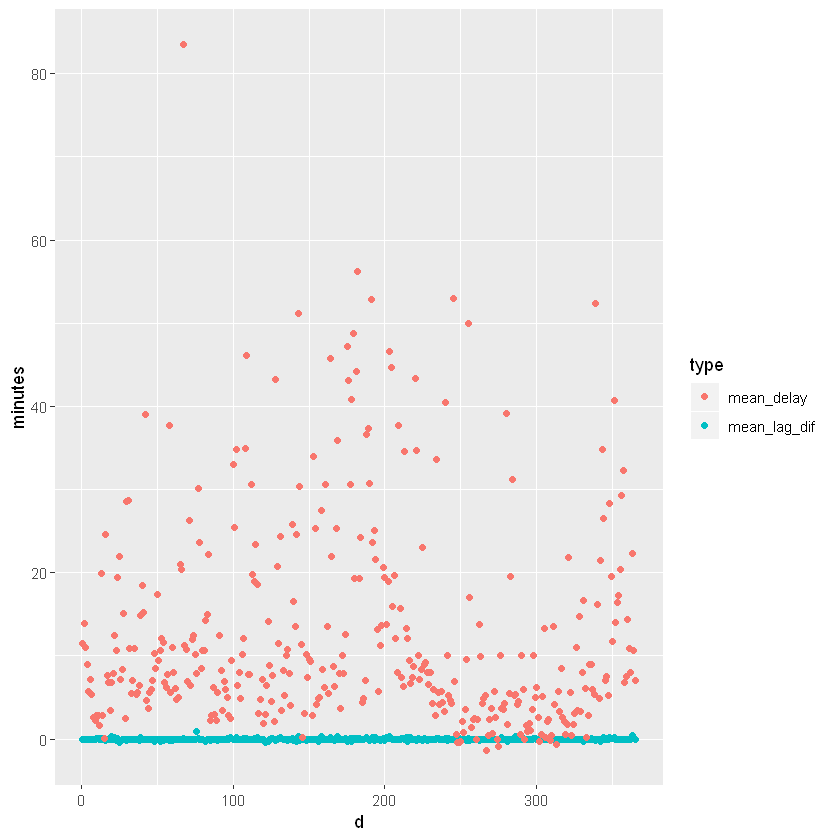

In [55]:
flights %>% group_by(year, month, day) %>%
  mutate(lag_dif = dep_delay - lag(dep_delay)) %>%
  summarise(
    mean_lag_dif= mean(lag_dif, na.rm = TRUE),
    mean_delay= mean(dep_delay, na.rm = TRUE)) %>%
  ungroup() %>% mutate(d = row_number()) %>%
  gather(key = type, value = minutes, mean_lag_dif, mean_delay) %>%
  ggplot(aes(x = d)) +
  geom_point(aes(y = minutes, color = type))

Look at each destination. Can you find flights that are suspiciously fast? (i.e. flights that represent a potential data entry error). Compute the air time a flight relative to the shortest flight to that destination. Which flights were most delayed in the air?

In [56]:
flights %>% mutate(speed = distance / air_time * 60 * 1.609) %>%
  arrange(speed %>% desc) %>% select(speed, dest, distance, air_time) %>%
  arrange(desc(speed)) %>% head(10)

speed,dest,distance,air_time
<dbl>,<chr>,<dbl>,<dbl>
1131.7458,ATL,762,65
1046.3690,MSP,1008,93
1042.6320,GSP,594,55
1031.5989,BNA,748,70
951.6086,PBI,1035,105
907.4760,SJU,1598,170
896.9240,SJU,1598,172
895.3395,STT,1623,175
891.7394,SJU,1598,173


In [57]:
flights %>% group_by(dest) %>%
  mutate(r = min_rank(air_time)) %>%
  filter(r < 2) %>%
  select(air_time, dest, distance)

air_time,dest,distance
<dbl>,<chr>,<dbl>
31,BWI,169
105,PBI,1035
38,PWM,273
20,BDL,116
38,PWM,269
38,PWM,269
35,ACK,199
35,ACK,199
102,MSN,812


Find all destinations that are flown by at least two carriers. Use that information to rank the carriers.

In [58]:
flights %>% group_by(dest) %>%
  mutate(n = n_distinct(carrier)) %>%
  filter(n > 1)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,n
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,2
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,2
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,3
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,2
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,7
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,7
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,4
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,6
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,4


For each plane, count the number of flights before the first delay of greater than 1 hour.

In [64]:
pop_dest <- flights %>% 
        group_by(dest) %>% 
        summarise(num.carrier = length(unique(carrier))) %>% 
        filter(num.carrier >= 2) %>% 
        arrange(desc(num.carrier))


In [65]:
flights %>% 
        filter(dest %in% pop_dest$dest) %>% 
        group_by(carrier) %>% 
        summarise(num.dests = length(unique(dest))) %>% 
        arrange(desc(num.dests))

carrier,num.dests
<chr>,<int>
EV,51
9E,48
UA,42
DL,39
B6,35
AA,19
MQ,19
WN,10
OO,5
